In [65]:
from scipy import integrate

import pandas as pd
import numpy as np
import os
import pickle as pkl
import h5py
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [66]:
#可以以 1min, 2min, 5min, 60min 为unit 进行数据集不同粒度的划分

def calculateHourlyUsage(data):
    cols = ['hour','no_of_jobs','machines', 'mean_cpu_usage']
    result = pd.DataFrame(columns=cols)
    print("(60Min Unit) started loading")
    for i in tqdm(range(30 * 24 )):
        range_min = i * 3600 * (10**6) # 扩大数据量，以6分钟为一个粒度？
        range_max = (i + 1) * 3600 * (10**6)
        jobs_of_hour = data[(data['end_time'] >= range_min) & (data['end_time'] < range_max)]
        no_of_jobs = len(jobs_of_hour['job_id'].unique())
        avg_cpu = np.average(jobs_of_hour['mean_cpu_usage'])
        machines = len(jobs_of_hour['machine_id'].unique())
        output_data = pd.DataFrame(columns=cols,data=[[i,no_of_jobs,machines, avg_cpu]])
        result = result.append(output_data)
    return result

def calculateFiveMinUsage(data): # 以五分钟为一个粒度
    print("start 5 mins loading:……")
    cols = ['hour','no_of_jobs','machines', 'mean_cpu_usage']
    resultFiveMin = pd.DataFrame(columns=cols)
    print("(FiveMin unit) started loading")

    for i in tqdm(range(30*24*12)):
        range_min = i * 60*5 *(10**6)
        range_max = (i+1) * 60*5 * (10**6)
        jobs_of_unit = data[(data['end_time'] >= range_min) & (data['end_time'] < range_max)]

        no_of_jobs = len(jobs_of_unit['job_id'].unique())
        avg_cpu = np.average(jobs_of_unit['mean_cpu_usage'])
        machines = len(jobs_of_unit['machine_id'].unique())
        output_data = pd.DataFrame(columns=cols,data=[[i,no_of_jobs,machines, avg_cpu]])
        resultFiveMin = resultFiveMin.append(output_data)

    print("@@@@@@resultFiveMin--length=", resultFiveMin)
    return resultFiveMin

def hour_to_day(hour_input):
    start_date = datetime.datetime(2011, 5, 1, 19, 0)
    datee = start_date + timedelta(microseconds = hour_input)
    print (datee)
    return datee.day - start_date.day

hour_to_day(50758000000)


2011-05-02 09:05:58


1

In [67]:
#usage_dir = "F:\\google-cluster2011\\task_usage\\"
#data_dir = "./data/task_usage/"
data_dir = "F:\\google-cluster2011\\task_usage\\"

task_usage_header = ['start_time','end_time','job_id','task_index','machine_id', 'mean_cpu_usage',
                     'canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                     'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                     'agg_type', 'sample_cpu_usage']

In [79]:
#提炼关键数据
output_dataframe = pd.DataFrame()
for i in tqdm(range(6)): #0~59
    file_str = str(i).zfill(5) 
    print (file_str)
    df = pd.read_csv(data_dir+"part-"+file_str+"-of-00500.csv.gz",header=None)
    df.columns = task_usage_header
    #保留 'end_time','job_id','task_index','machine_id', 'mean_cpu_usage' 这些列
    df.drop(df.columns[[0,6,7,8,9,10,11,12,13,14,15,16,17,18,19]], axis=1,inplace=True)

    output_dataframe = output_dataframe.append(df)
#     output_data_dir = "./data/task_usage_input_timeseries/part-"+file_str+"-of-00500.csv"
#     df.to_csv(output_data_dir, sep='\t')
#     break

# save the processed data to CSV
output_dataframe.to_csv('selectedOutputData.csv', encoding='utf-8')

  0%|          | 0/6 [00:00<?, ?it/s]

00000


 17%|█▋        | 1/6 [00:08<00:44,  8.84s/it]

00001


 33%|███▎      | 2/6 [00:17<00:35,  8.77s/it]

00002


 50%|█████     | 3/6 [00:27<00:27,  9.08s/it]

00003


 67%|██████▋   | 4/6 [00:35<00:17,  8.98s/it]

00004


 83%|████████▎ | 5/6 [00:45<00:09,  9.27s/it]

00005


100%|██████████| 6/6 [00:55<00:00,  9.31s/it]


In [69]:
output_dataframe_final = output_dataframe
print(output_dataframe.shape)

(161910460, 5)


In [70]:
output_dataframe_final
print(output_dataframe_final.shape)

(161910460, 5)


In [71]:
#output_dataframe_final = calculateHourlyUsage(output_dataframe_final)

将粒度由hour 变为 5 mins

In [72]:
output_dataframe_final = calculateFiveMinUsage(output_dataframe_final)

start 5 mins loading:……
(FiveMin unit) started loading


  0%|          | 0/8640 [00:00<?, ?it/s]C:\Users\lenovo\anaconda3\envs\google-trace-analysis\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\lenovo\anaconda3\envs\google-trace-analysis\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 8640/8640 [59:38<00:00,  2.41it/s]

@@@@@@resultFiveMin--length=     hour no_of_jobs machines  mean_cpu_usage
0      0          0        0             NaN
0      1          0        0             NaN
0      2        145     5018        0.010294
0      3       4032    12474        0.017124
0      4       4044    12474        0.016372
..   ...        ...      ...             ...
0   8635          0        0             NaN
0   8636          0        0             NaN
0   8637          0        0             NaN
0   8638          0        0             NaN
0   8639          0        0             NaN

[8640 rows x 4 columns]


In [73]:
print(output_dataframe_final)

    hour no_of_jobs machines  mean_cpu_usage
0      0          0        0             NaN
0      1          0        0             NaN
0      2        145     5018        0.010294
0      3       4032    12474        0.017124
0      4       4044    12474        0.016372
..   ...        ...      ...             ...
0   8635          0        0             NaN
0   8636          0        0             NaN
0   8637          0        0             NaN
0   8638          0        0             NaN
0   8639          0        0             NaN

[8640 rows x 4 columns]


In [74]:
output_dataframe_final = output_dataframe_final[output_dataframe_final['hour']<200]

In [75]:
output_dataframe_final

,hour,no_of_jobs,machines,mean_cpu_usage
0,0,0,0,NaN
0,1,0,0,NaN
0,2,145,5018,0.010294
0,3,4032,12474,0.017124
0,4,4044,12474,0.016372
...,...,...,...,...
0,195,4045,12471,0.018932
0,196,4090,12470,0.019289
0,197,4073,12473,0.018820
0,198,4084,12470,0.018244


In [76]:
X = np.array(output_dataframe_final['mean_cpu_usage'].tolist())

In [77]:
X
print(X)
#print(np.arange(140).shape)
#print(np.arange(140).reshape(140,1))


[       nan        nan 0.01029409 0.01712396 0.01637211 0.01649951
 0.01979944 0.01782469 0.02060546 0.01782119 0.01497885 0.01694715
 0.01837304 0.0200006  0.01774784 0.01839459 0.01692999 0.01678923
 0.01503977 0.01512642 0.01585057 0.01471598 0.01491745 0.01641494
 0.01706468 0.0164065  0.01631589 0.01653188 0.01741043 0.01708782
 0.01601123 0.0161632  0.01640503 0.01587181 0.01496413 0.01512069
 0.01643551 0.01715945 0.01627275 0.01631846 0.01702618 0.01433969
 0.01585925 0.01642066 0.0148474  0.01485173 0.01523702 0.01446108
 0.01462226 0.01495101 0.01534177 0.0152053  0.01463132 0.01425969
 0.01628967 0.01545    0.01469137 0.01556683 0.01422824 0.01465526
 0.01434273 0.01485585 0.01526384 0.01480943 0.01441496 0.01643153
 0.01482803 0.01525223 0.01464846 0.01530195 0.01492832 0.01438266
 0.01407248 0.01404776 0.01425757 0.01507924 0.01399443 0.01355205
 0.01236981 0.01304648 0.01395225 0.01450254 0.01434076 0.01413462
 0.01409985 0.01498585 0.01472779 0.0148396  0.01560204 0.0147

Using qisk Quantum NN

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from IPython.display import clear_output


quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024)

# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# construct simple feature map
param_x = Parameter('x')
feature_map = QuantumCircuit(1, name='fm')
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter('y')
ansatz = QuantumCircuit(1, name='vf')
ansatz.ry(param_y, 0)

# construct QNN
regression_opflow_qnn = TwoLayerQNN(1, feature_map, ansatz, quantum_instance=quantum_instance)

# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(neural_network=regression_opflow_qnn,
                                   loss='l2',
                                   optimizer=L_BFGS_B(),
                                   callback=callback_graph)

# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

print(np.arange(140).shape)
# fit to data
regressor.fit(np.arange(140).reshape(140,1), X)
# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)
# score the result
regressor.score(np.arange(140).reshape(140,1), X)

(140,)


ValueError: cannot reshape array of size 200 into shape (140,1)

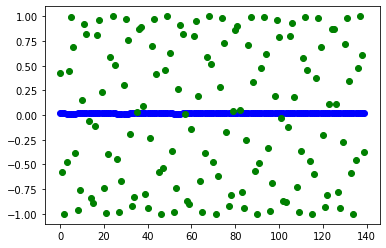

In [ ]:
#plot the data
plt.plot(np.arange(140).reshape(140,1), X, 'bo')
#plot the predicted data
plt.plot(np.arange(140).reshape(140,1), regressor.predict(np.arange(140).reshape(140,1)), 'go')
plt.show()



#ARIMA 模型参数拟合

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1428.193, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1429.872, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1427.895, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1427.869, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1431.829, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1425.664, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.757 seconds
(140,)
(80,) (60,)
[0.018576   0.018589   0.01860199 0.01861498 0.01862798 0.01864097
 0.01865396 0.01866696 0.01867995 0.01869294 0.01870593 0.01871893
 0.01873192 0.01874491 0.01875791 0.0187709  0.01878389 0.01879689
 0.01880988 0.01882287 0.01883587 0.01884886 0.01886185 0.01887485
 0.01888784 0.01890083 0.01891383 0.01892682 0.01893981 0.01895281
 0.0189658  0.01897879 0.01899178 0.01900478 0.01901777 0.01903076
 0.01904376 0.01905675 0.01906974 0.01908274 0.01909573 0

C:\Users\lenovo\anaconda3\envs\google-trace-analysis\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


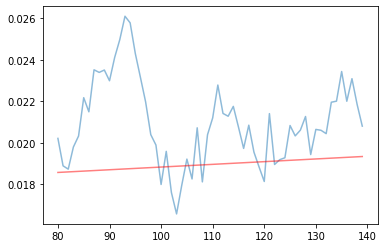

In [ ]:
# 只用84个数据进行拟合，拟合并不是很理想
# 1）扩充数据规模，预处理，规整数据；2）神经网络方法，3）量子神经网络的方法
from pmdarima import auto_arima
stepwise_fit = auto_arima(X, trace=True, suppress_warnings=True)
# 得出结果 Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
#Total fit time: 4.207 seconds


# 训练ARIMA的数据集分割，训练集+测试集
print (X.shape)
trainSet_arima,testSet_arima = np.split(X,[80])
#testSet_arima = X.iiloc[-20:]
print(trainSet_arima.shape, testSet_arima.shape)

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(trainSet_arima,order=(0,1,0))
model=model.fit()
model.summary()

#检查how good of the model
start =len(trainSet_arima)
end = start + len(testSet_arima) - 1
pred = model.predict(start=start, end=end, typ = 'levels')
#pred.plot(legend = True)
#testSet_arima.plot(legend = True)
print(pred)
print(testSet_arima)

plt.plot(np.arange(80, 140), testSet_arima, label='Actual_value', alpha=0.5)
plt.plot(np.arange(80, 140), pred, c='r', label='Predicted_EWMA', alpha=0.5)

# Time Series

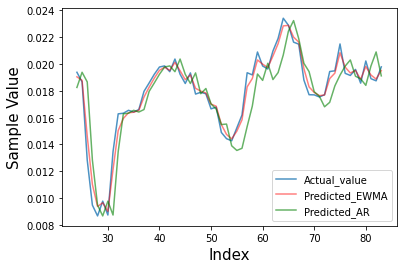

EWMA error:  2.375324376963549 %
AUTO REG error:  7.648123792332566 %


In [ ]:
## helper functions
## in both the functions t is the current value

def EWMA(X, t, x_t_hat=None, alpha=0.5): #,默认0.5,, 如果alpha->0, more weight to older data, if alpha->1, more weight to newer data
    if t == 0:    
        return alpha*X[t] * (1-alpha)*X[t]
    if x_t_hat:
        return alpha*X[t] + (1-alpha)*x_t_hat
    else:
        return alpha*X[t] + (1-alpha)*EWMA(X, t-1, None, alpha=alpha)

def seasonal_observed(X, t, season=144):
    return X[t-season+1]


class AutoRegression(object):
    def __init__(self, p=3, X=None):
        self.p = p
        self.X = X
        self.n = len(X)
        self.beta = np.ones((p, 1))/(p+1)
        self.LR_solver = LinearRegression(n_jobs=-1, fit_intercept=False)
        
    def get_features(self, start=0, end=-1):
        A = []
        for i in range(start, end-self.p):
            A.append(self.X[i:(i+self.p)])

        A = np.array(A)
        n = A.shape[0]
        A = np.hstack((np.ones((n,1)), A))
        return A
        
    def fit(self, end=-1): ## use 'end' inside, for our eg end = 577
        features = self.get_features(0, end)
        labels = np.array(self.X[self.p:end])
        self.LR_solver.fit(features, labels)
    
    def predict(self, t): ## t is the value we want to predict, same as the previous 'end' = 577
        features = self.get_features(t-self.p-1, t)
        return self.LR_solver.predict(features)

# 起点非24开始，加一个变量
delta = 0

def plotGraph(X,pred_ewma,pred_auto):
    plt.xlabel('Index', fontsize=15)
    plt.ylabel('Sample Value', fontsize=15)
    plt.plot(np.arange(24 + delta, 84), X, label='Actual_value', alpha=0.8)
    plt.plot(np.arange(24 + delta, 84), pred_ewma, c='r', label='Predicted_EWMA', alpha=0.5)
    plt.plot(np.arange(24 + delta, 84), pred_auto, c='g', label='Predicted_AR', alpha=0.6)

    plt.legend(fontsize=10)
    plt.show()

def errorCalc(actual,predict):
    return (np.abs(predict-actual)*100/actual).mean()
    
def calcTimeSeries(X):
    ar_model = AutoRegression(p=23 + delta, X=X)
    pred_auto = []
    for i in range(24 + delta, len(X)):
        ar_model.fit(end=i)
        pred_auto.append(ar_model.predict(t=i))

    pred_auto = np.array(pred_auto).squeeze()
    
    y_t_hat = X[23 + delta]
    alpha = 0.7
    pred_ewma = []

    for i in range(24 + delta, len(X)):
        y_t_hat = EWMA(X, i, y_t_hat, alpha)
        pred_ewma.append(y_t_hat)
    
    pred_ewma = np.array(pred_ewma)
#     print X[24]
#     print pred_auto
#     print pred_ewma
    y=[]
    for i in range(24 + delta,len(X)):
        y.append(X[i])
    X=y
    plotGraph(X,pred_ewma,pred_auto)
    print ("EWMA error: ",errorCalc(X,pred_ewma),"%")
    print ("AUTO REG error: ",errorCalc(X,pred_auto),"%")


calcTimeSeries(X)

In [ ]:
print (X)

[0.01753654 0.01671724 0.01628377 0.01571072 0.01498057 0.01495185
 0.01394167 0.01502232 0.01649895 0.01657997 0.01664338 0.01745756
 0.01696358 0.0181543  0.01921209 0.0185627  0.0188185  0.01891544
 0.02145261 0.02142198 0.01988755 0.02009669 0.02083384 0.01824115
 0.01937279 0.01865439 0.01282313 0.00946815 0.00866318 0.00976388
 0.00873009 0.01345372 0.01627282 0.01631837 0.01653781 0.01640791
 0.01659396 0.01794766 0.01857603 0.01922389 0.01976533 0.01984754
 0.01941553 0.02035863 0.01922068 0.01853696 0.01932489 0.01774829
 0.01787929 0.01776996 0.0166457  0.01677423 0.01488547 0.0144224
 0.01426421 0.01522806 0.01618755 0.01933787 0.01917755 0.02088414
 0.019842   0.01961764 0.0209591  0.0218979  0.02340094 0.02287934
 0.02161878 0.02146912 0.01879018 0.01769925 0.01768853 0.01753083
 0.01769753 0.01942874 0.01948125 0.02148444 0.01929276 0.01913444
 0.0195879  0.01856301 0.02021539 0.01889404 0.01873533 0.0198003
 0.02032871 0.02217466 0.02149575 0.02351722 0.02339261 0.023507